# 예측 모델 실습

### auto-mpg.csv 데이터를 통해,  
### mpg (mile per gallern, 자동차 연비)  를 예측하는 모델을 만드세요.

컬럼 정보 :

MPG (miles per gallon - 연비),

cylinders (실린더 갯수)

engine displacement (inches 배기량),

horsepower (마력),

vehicle weight (lbs. 무게),

time to accelerate from O to 60 mph (sec. 60mph까지 걸리는 시간),

model year ,

origin of car (1. American,   2. European,   3. Japanese).

Also provided are the car labels (types)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('../data/auto-mpg.csv')

In [3]:
df.isna().sum()

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: int64

In [4]:
df.head(3)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [5]:
y = df['mpg']

In [6]:
X = df.loc [:,'cyl' : 'origin']

In [7]:
df.head(3)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cyl     392 non-null    int64  
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   yr      392 non-null    int64  
 6   origin  392 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 21.6 KB


In [9]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regressor = LinearRegression()

In [14]:
regressor # 학습 안 한 상태

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
regressor.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
regressor.predict(X_test)

array([15.79246384, 30.05475212,  9.98308996, 24.23322743, 14.69035105,
       34.63928288, 23.49956583, 16.91277676, 24.26438645, 26.86808168,
       24.71122826, 32.46281449, 28.2875759 , 31.8166899 , 28.2279102 ,
       30.7836003 , 20.85322048, 17.1190894 ,  5.89170994, 14.8223311 ,
       10.10734243, 18.97727918, 33.67877714, 11.63590148, 10.57533674,
       26.5987179 , 12.64531129,  7.89776731, 29.41629126, 14.07772621,
       27.00707961, 34.92880676, 27.39821489, 30.01485794, 34.00625839,
       13.64894229, 15.8686835 , 24.38715121, 23.11302048, 19.05465433,
       14.64735325, 22.1084433 , 31.21946102, 22.65827929, 26.49649424,
       19.76973792, 15.36405941, 30.75094104, 20.32344843, 13.69664544,
       21.29878553, 23.37370985, 24.52653051, 24.34122647, 33.46935223,
       21.46173568, 25.38517611, 24.84739879, 11.62551073, 29.1532658 ,
       25.72050975, 29.69206492, 30.61451721, 10.23973514, 19.75433343,
       23.44044687, 24.01382996, 36.05329089, 25.55969322, 13.54

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
((y_test - y_pred ) ** 2).mean() ## MSE

np.float64(8.533699341813788)

In [19]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error , mean_absolute_error ,r2_score

In [20]:
root_mean_squared_error(y_test , y_pred)

2.9212496199081976

In [21]:
mean_absolute_error(y_test , y_pred)

2.2985750752058025

In [22]:
r2_score(y_test , y_pred) #0~ 1 사이의 값으로 나오는데 , 1로 나올수록 성능이 좋다

0.8232816509979339

In [23]:
df_test = y_test.to_frame().reset_index(drop=True)

In [24]:
df_test['y_pred'] = y_pred

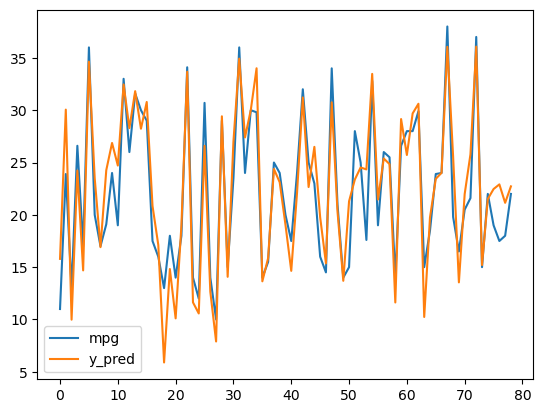

In [25]:
df_test.plot()
plt.show()

In [26]:
y_test.values

array([11. , 23.9, 13. , 26.6, 17. , 36. , 20. , 17. , 19.1, 24. , 19. ,
       33. , 26. , 31.6, 30. , 29. , 17.5, 16. , 13. , 18. , 14. , 18. ,
       34.1, 14. , 12. , 30.7, 14. , 10. , 29. , 15. , 23.5, 36. , 24. ,
       30. , 29.8, 14. , 15.5, 25. , 24. , 20. , 17.5, 24. , 32. , 25. ,
       23. , 16. , 14.5, 34. , 21. , 14. , 15. , 28. , 25. , 17.6, 32.8,
       19. , 26. , 25.5, 14. , 26.6, 28. , 28. , 29.9, 15. , 18.5, 23.9,
       24. , 38. , 19.8, 16.5, 20.5, 21.6, 37. , 15. , 22. , 19. , 17.5,
       18. , 22. ])

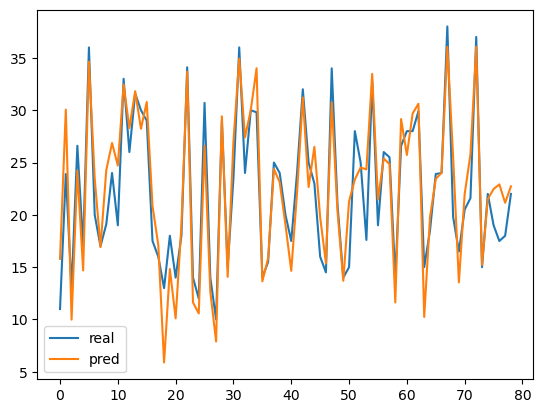

In [27]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['real','pred'])
plt.show()

In [28]:
df = pd.read_csv('../data/ecommerce.csv', index_col= 0)
df

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
0,0,0,76,21125,24926,1,295
1,1,1,74,22287,27811,1,210
2,2,0,42,19364,26016,1,207
3,3,0,49,23621,23335,1,220
4,4,0,83,24431,27068,1,201
...,...,...,...,...,...,...,...
360,3,0,65,24232,24854,1,224
361,4,0,95,21161,21804,1,372
362,5,0,23,22293,23212,1,206
363,6,0,99,24797,25393,1,262


In [29]:
df.describe()

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.991781,0.150685,54.030137,21989.027397,24136.219178,6.424658,232.358904
std,2.006155,0.358233,26.246542,1691.546551,2312.538599,3.492212,68.458136
min,0.000000,0.000000,10.000000,19003.000000,20038.000000,1.000000,61.000000
25%,1.000000,0.000000,32.000000,20673.000000,22322.000000,3.000000,191.000000
50%,3.000000,0.000000,55.000000,21872.000000,24150.000000,6.000000,225.000000
75%,5.000000,0.000000,76.000000,23422.000000,26097.000000,9.000000,279.000000
max,6.000000,1.000000,99.000000,24996.000000,27992.000000,12.000000,407.000000


In [30]:
df['IsHoliday'].unique()

array([0, 1])

In [31]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [32]:
df['Sales'].unique()

array([295, 210, 207, 220, 201, 213, 164, 204, 193, 266, 299, 122, 263,
       320, 270, 389,  84, 230, 253, 318, 190, 228, 352, 267, 286, 217,
       172, 258, 242, 294, 200, 342, 288, 178, 244, 300, 198, 100, 224,
       211, 251, 239, 234, 328, 339, 221, 377, 237, 212, 287, 156, 268,
       197, 364, 184, 365, 206, 325, 232, 280, 322, 290, 250, 355, 262,
       225, 203, 303, 223, 134, 281, 205, 289, 302, 252, 312, 187, 215,
       218, 245, 167, 196, 274, 235, 202, 279, 351, 154, 296, 358, 136,
       316, 307, 241, 275, 330, 309, 259, 331, 407, 366,  95, 329, 195,
       310, 159, 369, 191, 380, 347, 146, 247, 272, 161, 162, 359, 214,
       145, 315, 182, 153,  99, 278, 344, 283, 277, 112, 174, 246, 173,
       183, 340, 168, 169, 341, 273, 118, 150,  90,  88, 170, 243, 151,
       160, 282, 143,  82, 192, 219, 261, 179, 186, 132, 208, 254, 185,
       140, 199, 231, 171, 116, 104, 102, 297, 248,  61, 227, 249, 108,
       126, 226, 128, 139, 127, 357, 236, 260, 144, 304, 308, 10

## 상관관계분석
중요 !!!!!!!!!!!!!!

In [33]:
df.corr()

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
DayOfWeek,1.000000,-0.101485,-0.027126,0.058028,0.054830,-0.001853,-0.076832
IsHoliday,-0.101485,1.000000,0.007405,-0.042057,-0.034416,-0.009566,0.121911
MarketingSpend,-0.027126,0.007405,1.000000,0.024803,-0.041695,0.012718,0.582831
CompetitorPrice,0.058028,-0.042057,0.024803,1.000000,0.066226,0.033093,-0.297661
Price,0.054830,-0.034416,-0.041695,0.066226,1.000000,-0.078575,-0.703286
Month,-0.001853,-0.009566,0.012718,0.033093,-0.078575,1.000000,-0.185007
Sales,-0.076832,0.121911,0.582831,-0.297661,-0.703286,-0.185007,1.000000


In [34]:
df[['IsHoliday','MarketingSpend']].corr()

,IsHoliday,MarketingSpend
IsHoliday,1.000000,0.007405
MarketingSpend,0.007405,1.000000


In [35]:
df[['IsHoliday','Sales']].corr()

,IsHoliday,Sales
IsHoliday,1.000000,0.121911
Sales,0.121911,1.000000


In [36]:
df[['Price','CompetitorPrice','Sales']].corr()

,Price,CompetitorPrice,Sales
Price,1.000000,0.066226,-0.703286
CompetitorPrice,0.066226,1.000000,-0.297661
Sales,-0.703286,-0.297661,1.000000


In [37]:
# 파이차트 ? 퍼센테이지로 나타내고 싶을때

In [38]:
# 두 컬럼과의 관계 ? 스케터

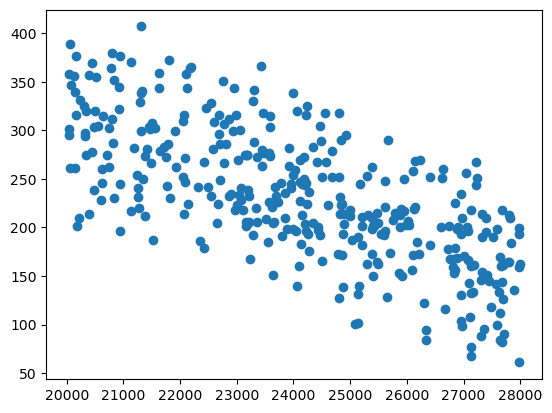

In [39]:
plt.scatter(data = df, x='Price' , y='Sales')
plt.show()

In [40]:
df[['Price','Sales']].head()

,Price,Sales
0,24926,295
1,27811,210
2,26016,207
3,23335,220
4,27068,201


In [41]:
df[['Price','Sales']].corr()

,Price,Sales
Price,1.000000,-0.703286
Sales,-0.703286,1.000000


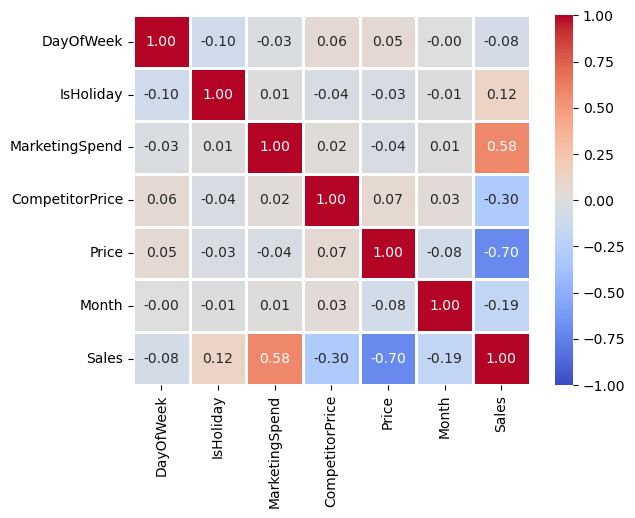

In [42]:
sb.heatmap(data= df.corr(), linewidths=0.8, vmin=-1, vmax= 1, cmap='coolwarm',
          annot=True, fmt='.2f')
plt.show()

In [43]:
# 세일즈 예상 하는 법
df

,DayOfWeek,IsHoliday,MarketingSpend,CompetitorPrice,Price,Month,Sales
0,0,0,76,21125,24926,1,295
1,1,1,74,22287,27811,1,210
2,2,0,42,19364,26016,1,207
3,3,0,49,23621,23335,1,220
4,4,0,83,24431,27068,1,201
...,...,...,...,...,...,...,...
360,3,0,65,24232,24854,1,224
361,4,0,95,21161,21804,1,372
362,5,0,23,22293,23212,1,206
363,6,0,99,24797,25393,1,262


# # RandomForest, XGBoost 
## 리그레션에 많이 사용하는 함수

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
regressor2 = RandomForestRegressor()

In [46]:
regressor2.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
y_pred2 = regressor2.predict(X_test)

In [48]:
# 실제값과 리니어레그레션 예측값과 랜던포레스트의 예측값을 전부 합쳐서 보자

In [49]:
df_test = y_test.to_frame().reset_index(drop = True)

In [50]:
df_test['linear '] = y_pred

In [51]:
df_test['random '] = y_pred2

In [52]:
# 리니어그레션
mean_squared_error(y_test,y_pred)

8.533699341813788

In [53]:
# 랜덤포레스트
mean_squared_error(y_test,y_pred2)

6.417324177215183

In [54]:
r2_score(y_test,y_pred)

0.8232816509979339

In [55]:
r2_score(y_test,y_pred2)

0.8671081686635246

In [56]:
! pip install xgboost

In [57]:
regressor2 = RandomForestRegressor(n_estimators= 50 , random_state= 7)

In [58]:
regressor2.fit(X_train, y_train)

,n_estimators,50
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
mean_squared_error(y_test,y_pred)

8.533699341813788

In [60]:
mean_squared_error(y_test,y_pred2)

6.417324177215183

In [61]:
from xgboost import XGBRegressor

In [62]:
regressor3 = XGBRegressor(n_estimators= 100 , random_state= 7)

In [63]:
regressor3.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [64]:
y_pred3 = regressor3.predict(X_test)

In [65]:
df_test['xboost'] = y_pred3
df_test

,mpg,linear,random,xboost
0,11.0,15.792464,14.160,15.229516
1,23.9,30.054752,25.016,24.419329
2,13.0,9.983090,12.730,11.993239
3,26.6,24.233227,21.699,24.769009
4,17.0,14.690351,14.810,14.770574
...,...,...,...,...
74,22.0,21.516858,20.211,19.735401
75,19.0,22.467432,21.705,22.453043
76,17.5,22.909375,19.053,18.999199
77,18.0,21.149751,21.154,21.438984


In [66]:
mean_squared_error(y_test, y_pred)

8.533699341813788

In [67]:
mean_squared_error(y_test, y_pred2)

6.417324177215183

In [68]:
mean_squared_error(y_test, y_pred3)

8.834886361102155

In [69]:
r2_score(y_test, y_pred)

0.8232816509979339

In [70]:
r2_score(y_test, y_pred2)

0.8671081686635246

In [71]:
r2_score(y_test, y_pred3)

0.817044581860907

In [72]:
# 파이브라이닝 , 그리드서치

In [73]:
df = pd.read_csv('../data/healthcare.csv',index_col = 0)
df.head()

,Age,Gender,BMI,Region,Smoker,NumVisits,InsuranceClaim
0,51.0,Female,NaN,South,No,19.0,70.081987
1,92.0,Female,38.074006,West,Yes,13.0,92.747518
2,14.0,Male,NaN,North,No,8.0,46.794138
3,NaN,Female,27.020924,West,No,7.0,44.789132
4,60.0,Male,37.961368,North,No,16.0,71.790344


In [74]:
df.isna().sum()

Age               30
Gender             0
BMI               50
Region             0
Smoker             0
NumVisits         20
InsuranceClaim     0
dtype: int64

In [75]:
df.dropna(inplace= True)

In [76]:
y = df['InsuranceClaim']

In [77]:
X =df.drop('InsuranceClaim' , axis =1)

In [78]:
X.head()

,Age,Gender,BMI,Region,Smoker,NumVisits
1,92.0,Female,38.074006,West,Yes,13.0
4,60.0,Male,37.961368,North,No,16.0
5,20.0,Female,29.676706,East,No,1.0
6,82.0,Male,15.821167,North,No,2.0
7,86.0,Male,37.818737,East,No,7.0


In [79]:
sorted(df['Gender'].unique())

['Female', 'Male']

In [80]:
sorted(df['Region'].unique())

['East', 'North', 'South', 'West']

In [81]:
# 파이프라이닝

In [82]:
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder , MinMaxScaler

In [83]:
from sklearn.compose import ColumnTransformer

In [84]:
ct =  ColumnTransformer ([('label',OrdinalEncoder(),[1,4]),
                          ('onehot',OneHotEncoder(),[3]),
                          ('scaler',MinMaxScaler(),[0,2,5])])

In [85]:
regressor = LinearRegression()

In [86]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
y_pred = regressor.predict(X_test)
y_pred

array([15.79246384, 30.05475212,  9.98308996, 24.23322743, 14.69035105,
       34.63928288, 23.49956583, 16.91277676, 24.26438645, 26.86808168,
       24.71122826, 32.46281449, 28.2875759 , 31.8166899 , 28.2279102 ,
       30.7836003 , 20.85322048, 17.1190894 ,  5.89170994, 14.8223311 ,
       10.10734243, 18.97727918, 33.67877714, 11.63590148, 10.57533674,
       26.5987179 , 12.64531129,  7.89776731, 29.41629126, 14.07772621,
       27.00707961, 34.92880676, 27.39821489, 30.01485794, 34.00625839,
       13.64894229, 15.8686835 , 24.38715121, 23.11302048, 19.05465433,
       14.64735325, 22.1084433 , 31.21946102, 22.65827929, 26.49649424,
       19.76973792, 15.36405941, 30.75094104, 20.32344843, 13.69664544,
       21.29878553, 23.37370985, 24.52653051, 24.34122647, 33.46935223,
       21.46173568, 25.38517611, 24.84739879, 11.62551073, 29.1532658 ,
       25.72050975, 29.69206492, 30.61451721, 10.23973514, 19.75433343,
       23.44044687, 24.01382996, 36.05329089, 25.55969322, 13.54

In [88]:
r2_score(y_test,y_pred)

0.8232816509979339

In [89]:
# 파이프라이닝

In [90]:
from sklearn.pipeline import Pipeline

In [91]:
pipe = Pipeline(  steps= [ ("preprocessing" , ct  ) ,
                           ("regressor" , regressor ) ]  )

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train.head(2)

,Age,Gender,BMI,Region,Smoker,NumVisits
435,14.0,Female,23.148137,South,No,16.0
123,4.0,Male,21.662460,West,No,1.0


In [93]:
pipe.fit(X_train,y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('label', ...), ('onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [94]:
y_pred = pipe.predict(X_test)
y_pred

array([60.48179805, 63.44516252, 70.611469  , 75.50964392, 53.63202614,
       75.92428158, 68.23389507, 60.745702  , 57.88668667, 77.3705967 ,
       62.32608181, 48.07742276, 72.88405212, 58.57231464, 73.48760367,
       54.7762362 , 64.18756789, 34.58433538, 48.10909232, 52.75001431,
       62.85027794, 56.5074751 , 56.82426901, 64.14919401, 59.0861962 ,
       79.7081743 , 63.23824524, 66.16196108, 86.89309729, 50.84820087,
       51.46942912, 83.65905403, 47.35463392, 56.30942085, 59.36965568,
       66.29350362, 45.91499134, 59.82016783, 69.97794308, 50.9048794 ,
       50.0260105 , 74.82448634, 60.18005206, 60.80523452, 61.73678859,
       45.86720029, 74.87528696, 62.71868922, 73.6312923 , 42.41557012,
       61.43212545, 58.87826111, 39.776723  , 50.00651981, 51.54248203,
       71.51084195, 56.33379702, 69.57272917, 69.37206007, 70.10244501,
       78.16562373, 40.30721566, 81.29297702, 55.47194826, 74.71648172,
       83.37170417, 52.45509128, 50.98171809, 53.66206206, 65.75

In [95]:
import joblib

In [96]:
joblib.dump(pipe,'pipe.pkl')

['pipe.pkl']

In [97]:
pipe2 = joblib.load('pipe.pkl')

In [98]:
## 새로운 사람의 데이터가 있을때 보험금 수령액을 예측하려한다
## 나이는 45세 , 남자이고 , BMI - 28.5 , 지역은 South , 담배를 피며 , 년간 병원 방문 횟수는 12회

In [99]:
data = [ { 'Age' : 45 , 'Gender' : 'Male', 'BMI' : 28.5, 'Region':'South', 'Smoker':'Yes', 'NumVisits':12  } ]

In [100]:
new_data = pd.DataFrame(data)
new_data

,Age,Gender,BMI,Region,Smoker,NumVisits
0,45,Male,28.5,South,Yes,12


In [101]:
pipe2.predict(new_data)

array([69.93560068])

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
# 그리드 서치를 적용 grid search = 여러가지 경우에 대해서 테스트를 해보고 가장 좋았을때 검색

In [104]:
regressor2 = RandomForestRegressor(random_state=7)

In [105]:
pipe = Pipeline([('preprocessingg', ct),
                    ('regressor2' , regressor2)])       

In [106]:
param_grid = { 'regressor2__n_estimators' : [ 50, 100, 200, 300, 400 ] ,
               'regressor2__max_depth' : [None, 10, 20, 30],
               'regressor2__min_samples_split' : [2, 5, 10],
               'regressor2__min_samples_leaf' : [1, 2, 4]}

In [107]:
from sklearn.model_selection import GridSearchCV

In [120]:
grid_search = GridSearchCV( pipe, param_grid, scoring='neg_mean_squared_error', cv=10,
                              verbose = 2)

In [130]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None, regressor2__min_samples_leaf=1, regressor2__min_samples_split=2, regressor2__n_estimators=50; total time=   0.0s
[CV] END regressor2__max_depth=None

,estimator,Pipeline(step...om_state=7))])
,param_grid,"{'regressor2__max_depth': [None, 10, ...], 'regressor2__min_samples_leaf': [1, 2, ...], 'regressor2__min_samples_split': [2, 5, ...], 'regressor2__n_estimators': [50, 100, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,10
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('label', ...), ('onehot', ...), ...]"


### 최적의 파라미터와, 성능을 확인하자

In [131]:
grid_search.best_params_

{'regressor2__max_depth': None,
 'regressor2__min_samples_leaf': 1,
 'regressor2__min_samples_split': 5,
 'regressor2__n_estimators': 200}

In [132]:
grid_search.best_score_

np.float64(-35.56383739500035)

In [133]:
best_regressor = grid_search.best_estimator_

In [134]:
y_pred = best_regressor.predict(X_test)

In [135]:
mean_squared_error(y_test, y_pred)

39.21896662777554

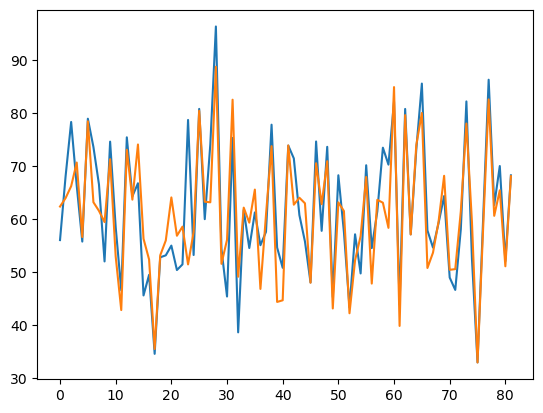

In [137]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.show()

# 리그레션 문제는 리니어리그레션 , 랜덤포레스트 , XG 부스트를 이용하면 된다